# Introduction to DataFrames
**[Bogumił Kamiński](http://bogumilkaminski.pl/about/), October 5, 2022**

In [1]:
using DataFrames

## Getting basic information about a data frame

Let's start by creating a `DataFrame` object, `x`, so that we can learn how to get information on that data frame.

In [2]:
x = DataFrame(A = [1, 2], B = [1.0, missing], C = ["a", "b"])

Row,A,B,C
,Int64,Float64?,String
1,1,1.0,a
2,2,missing,b


The standard `size` function works to get dimensions of the `DataFrame`,

In [3]:
size(x), size(x, 1), size(x, 2)

((2, 3), 2, 3)

as well as `nrow` and `ncol` from R.

In [4]:
nrow(x), ncol(x)

(2, 3)

`describe` gives basic summary statistics of data in your `DataFrame` (check out the help of `describe` for information on how to customize shown statistics).

In [5]:
describe(x)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,A,1.5,1,1.5,2,0,Int64
2,B,1.0,1.0,1.0,1.0,1,"Union{Missing, Float64}"
3,C,,a,,b,0,String


you can limit the columns shown by `describe` using `cols` keyword argument

In [6]:
describe(x, cols=1:2)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,Type
1,A,1.5,1,1.5,2,0,Int64
2,B,1.0,1.0,1.0,1.0,1,"Union{Missing, Float64}"


`names` will return the names of all columns as strings

In [7]:
names(x)

3-element Vector{String}:
 "A"
 "B"
 "C"

you can also get column names with a given `eltype`:

In [8]:
names(x, String)

1-element Vector{String}:
 "C"

use `propertynames` to get a vector of `Symbol`s:

In [9]:
propertynames(x)

3-element Vector{Symbol}:
 :A
 :B
 :C

using `eltype` on `eachcol(x)` returns element types of columns:

In [10]:
eltype.(eachcol(x))

3-element Vector{Type}:
 Int64
 Union{Missing, Float64}
 String

Here we create some large `DataFrame`

In [11]:
y = DataFrame(rand(1:10, 1000, 10), :auto)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,3,2,7,4,10,6,1,4,6,3
2,1,2,2,3,10,1,10,6,5,1
3,7,10,8,8,4,4,2,1,9,6
4,2,3,7,1,6,8,8,3,3,2
5,9,10,1,4,7,2,8,5,2,10
6,10,4,1,5,2,1,8,4,1,10
7,5,1,6,9,2,8,5,5,7,8
8,6,3,8,9,6,9,10,9,8,2
9,7,7,1,6,5,5,4,6,2,2


and then we can use `first` to peek into its first few rows

In [12]:
first(y, 5)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,3,2,7,4,10,6,1,4,6,3
2,1,2,2,3,10,1,10,6,5,1
3,7,10,8,8,4,4,2,1,9,6
4,2,3,7,1,6,8,8,3,3,2
5,9,10,1,4,7,2,8,5,2,10


and `last` to see its bottom rows.

In [13]:
last(y, 3)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,5,2,2,4,8,1,7,2,6,9
2,2,6,9,7,10,3,8,6,9,3
3,10,4,9,10,1,10,6,9,8,8


Using `first` and `last` without number of rows will return a first/last `DataFrameRow` in the `DataFrame`

In [14]:
first(y)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,3,2,7,4,10,6,1,4,6,3


In [15]:
last(y)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1000,10,4,9,10,1,10,6,9,8,8


### Displaying wide data frames

Create a wide and tall data frame:

In [16]:
df = DataFrame(rand(100, 200), :auto)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,0.249412,0.559655,0.378745,0.137394,0.948394,0.635572,0.935412,0.280237,0.298434,0.562121,0.422646,0.306769,0.184239,0.761514,0.497445,0.921715,0.242146,0.806812,0.848843,0.0452605,0.380708,0.8512,0.8944,0.382554,0.374517,0.729465,0.802631,0.936001,0.781134,0.700261,0.667519,0.283381,0.206644,0.0914723,0.786683,0.122758,0.899991,0.685516,0.0596386,0.157927,0.681217,0.303366,0.656468,0.686573,0.62445,0.643847,0.440427,0.181951,0.224681,0.383298,0.0546941,0.472388,0.888212,0.431548,0.0218663,0.050868,0.307723,0.882558,0.00782513,0.556511,0.974478,0.170432,0.443193,0.709274,0.375205,0.529572,0.232876,0.14136,0.10853,0.28142,0.0962248,0.657313,0.772606,0.569577,0.481707,0.21998,0.943492,0.517465,0.788573,0.130805,0.192986,0.628709,0.474826,0.343057,0.542071,0.262552,0.155312,0.900407,0.969099,0.31975,0.562748,0.609972,0.0731349,0.109217,0.600659,0.674514,0.813645,0.290046,0.751774,0.140064,⋯
2,0.110629,0.211643,0.85364,0.889184,0.43874,0.432405,0.698155,0.044846,0.72579,0.612554,0.95542,0.239042,0.391704,0.0710033,0.595319,0.990282,0.334887,0.322537,0.0969591,0.525096,0.0369182,0.560639,0.0240156,0.387392,0.315697,0.939254,0.640522,0.339375,0.174917,0.127891,0.341653,0.0605413,0.620293,0.0040841,0.845827,0.511239,0.673765,0.752782,0.921155,0.0675625,0.153809,0.349169,0.986569,0.870692,0.490656,0.663186,0.0661922,0.867721,0.63255,0.515759,0.659839,0.751868,0.849729,0.993508,0.479148,0.132942,0.71072,0.726689,0.730419,0.263327,0.704462,0.374912,0.797514,0.642335,0.566045,0.356869,0.460741,0.58298,0.209343,0.890249,0.689613,0.217253,0.496443,0.180122,0.178431,0.560355,0.382425,0.388165,0.668452,0.177359,0.715897,0.536965,0.778197,0.501648,0.0379285,0.865216,0.360853,0.130374,0.765814,0.123611,0.601643,0.0159019,0.0218813,0.479441,0.293931,0.57172,0.703787,0.419902,0.63878,0.469695,⋯
3,0.466349,0.476323,0.507129,0.329598,0.854379,0.0897526,0.933332,0.842779,0.40718,0.50324,0.575441,0.641975,0.249865,0.578226,0.574444,0.305377,0.80035,0.713837,0.625547,0.683671,0.655787,0.527514,0.520218,0.797295,0.384063,0.0109032,0.315064,0.412489,0.499193,0.655655,0.00723092,0.542674,0.877234,0.185818,0.530018,0.92482,0.526685,0.0473893,0.719192,0.752802,0.571614,0.154694,0.0437621,0.64934,0.00665427,0.616821,0.156286,0.676603,0.958152,0.305398,0.817413,0.829401,0.227153,0.942676,0.625905,0.244693,0.714556,0.676951,0.385022,0.602986,0.751604,0.810795,0.549155,0.288145,0.178084,0.566834,0.0836573,0.110596,0.656725,0.94146,0.442837,0.544574,0.787328,0.16148,0.529305,0.834601,0.183141,0.7798,0.461514,0.971836,0.0658098,0.999377,0.961728,0.679264,0.740443,0.301887,0.247391,0.167979,0.328427,0.155577,0.980418,0.0875793,0.320074,0.943165,0.456884,0.916725,0.312776,0.0381242,0.523058,0.959724,⋯
4,0.804267,0.602622,0.859737,0.268283,0.535211,0.401073,0.762981,0.524647,0.568459,

### Most elementary get and set operations

Given the `DataFrame` `x` we have created earlier, here are various ways to grab one of its columns as a `Vector`.

In [17]:
x

Row,A,B,C
,Int64,Float64?,String
1,1,1.0,a
2,2,missing,b


In [18]:
x.A, x[!, 1], x[!, :A] # all get the vector stored in our DataFrame without copying it

([1, 2], [1, 2], [1, 2])

In [19]:
x."A", x[!, "A"] # the same using string indexing

([1, 2], [1, 2])

In [20]:
x[:, 1] # note that this creates a copy

2-element Vector{Int64}:
 1
 2

In [21]:
x[:, 1] === x[:, 1]

false

To grab one row as a `DataFrame`, we can index as follows.

In [22]:
x[1:1, :]

Row,A,B,C
,Int64,Float64?,String
1,1,1.0,a


In [23]:
x[1, :] # this produces a DataFrameRow which is treated as 1-dimensional object similar to a NamedTuple

Row,A,B,C
,Int64,Float64?,String
1,1,1.0,a


We can grab a single cell or element with the same syntax to grab an element of an array.

In [24]:
x[1, 1]

1

or a new `DataFrame` that is a subset of rows and columns

In [25]:
x[1:2, 1:2]

Row,A,B
,Int64,Float64?
1,1,1.0
2,2,missing


You can also use `Regex` to select columns and `Not` from InvertedIndices.jl both to select rows and columns

In [26]:
x[Not(1), r"A"]

Row,A
,Int64
1,2


In [27]:
x[!, Not(1)] # ! indicates that underlying columns are not copied

Row,B,C
,Float64?,String
1,1.0,a
2,missing,b


In [28]:
x[:, Not(1)] # : means that the columns will get copied

Row,B,C
,Float64?,String
1,1.0,a
2,missing,b


Assignment of a scalar to a data frame can be done in ranges using broadcasting:

In [29]:
x[1:2, 1:2] .= 1
x

Row,A,B,C
,Int64,Float64?,String
1,1,1.0,a
2,1,1.0,b


Assignment of a vector of length equal to the number of assigned rows using broadcasting

In [30]:
x[1:2, 1:2] .= [1,2]
x

Row,A,B,C
,Int64,Float64?,String
1,1,1.0,a
2,2,2.0,b


Assignment or of another data frame of matching size and column names, again using broadcasting:

In [31]:
x[1:2, 1:2] .= DataFrame([5 6; 7 8], [:A, :B])
x

Row,A,B,C
,Int64,Float64?,String
1,5,6.0,a
2,7,8.0,b


**Caution**

With `df[!, :col]` and `df.col` syntax you get a direct (non copying) access to a column of a data frame.
This is potentially unsafe as you can easily corrupt data in the `df` data frame if you resize, sort, etc. the column obtained in this way.
Therefore such access should be used with caution.

Similarly `df[!, cols]` when `cols` is a collection of columns produces a new data frame that holds the same (not copied) columns as the source `df` data frame. Similarly, modifying the data frame obtained via `df[!, cols]` might cause problems with the consistency of `df`.

The `df[:, :col]` and `df[:, cols]` syntaxes always copy columns so they are safe to use (and should generally be preferred except for performance or memory critical use cases).

Here are examples of how `Cols` and `Between` can be used to select columns of a data frame.

In [32]:
x = DataFrame(rand(4, 5), :auto)

Row,x1,x2,x3,x4,x5
,Float64,Float64,Float64,Float64,Float64
1,0.375774,0.111506,0.281562,0.334431,0.424942
2,0.453273,0.176734,0.190792,0.226112,0.759624
3,0.981711,0.4673,0.367482,0.789294,0.26243
4,0.969024,0.308621,0.856247,0.37713,0.583253


In [33]:
x[:, Between(:x2, :x4)]

Row,x2,x3,x4
,Float64,Float64,Float64
1,0.111506,0.281562,0.334431
2,0.176734,0.190792,0.226112
3,0.4673,0.367482,0.789294
4,0.308621,0.856247,0.37713


In [34]:
x[:, Cols("x1", Between("x2", "x4"))]

Row,x1,x2,x3,x4
,Float64,Float64,Float64,Float64
1,0.375774,0.111506,0.281562,0.334431
2,0.453273,0.176734,0.190792,0.226112
3,0.981711,0.4673,0.367482,0.789294
4,0.969024,0.308621,0.856247,0.37713


### Views

You can simply create a view of a `DataFrame` (it is more efficient than creating a materialized selection). Here are the possible return value options.

In [35]:
@view x[1:2, 1]

2-element view(::Vector{Float64}, 1:2) with eltype Float64:
 0.375773722376171
 0.45327278849919483

In [36]:
@view x[1,1]

0-dimensional view(::Vector{Float64}, 1) with eltype Float64:
0.375773722376171

In [37]:
@view x[1, 1:2] # a DataFrameRow, the same as for x[1, 1:2] without a view

Row,x1,x2
,Float64,Float64
1,0.375774,0.111506


In [38]:
@view x[1:2, 1:2] # a SubDataFrame

Row,x1,x2
,Float64,Float64
1,0.375774,0.111506
2,0.453273,0.176734


### Adding new columns to a data frame

In [39]:
df = DataFrame()

0×0 DataFrame

using `setproperty!`

In [40]:
x = [1, 2, 3]
df.a = x
df

Row,a
,Int64
1,1
2,2
3,3


In [41]:
df.a === x # no copy is performed

true

using `setindex!`

In [42]:
df[!, :b] = x
df[:, :c] = x
df

Row,a,b,c
,Int64,Int64,Int64
1,1,1,1
2,2,2,2
3,3,3,3


In [43]:
df.b === x # no copy

true

In [44]:
df.c === x # copy

false

In [45]:
df[!, :d] .= x
df[:, :e] .= x
df

Row,a,b,c,d,e
,Int64,Int64,Int64,Int64,Int64
1,1,1,1,1,1
2,2,2,2,2,2
3,3,3,3,3,3


In [46]:
df.d === x, df.e === x # both copy, so in this case `!` and `:` has the same effect

(false, false)

note that in our data frame columns `:a` and `:b` store the vector `x` (not a copy)

In [47]:
df.a === df.b === x

true

This can lead to silent errors. For example this code leads to a bug (note that calling `pairs` on `eachcol(df)` creates an iterator of (column name, column) pairs):

In [48]:
for (n, c) in pairs(eachcol(df))
    println("$n: ", pop!(c))
end

a: 3
b: 2
c: 3
d: 3
e: 3


note that for column `:b` we printed `2` as `3` was removed from it when we used `pop!` on column `:a`.

Such mistakes sometimes happen. Because of this DataFrames.jl performs consistency checks before doing an expensive operation (most notably before showing a data frame).

In [49]:
df

AssertionError: AssertionError: Data frame is corrupt: length of column :c (2) does not match length of column 1 (1). The column vector has likely been resized unintentionally (either directly or because it is shared with another data frame).

We can investigate the columns to find out what happend:

In [50]:
collect(pairs(eachcol(df)))

5-element Vector{Pair{Symbol, AbstractVector}}:
 :a => [1]
 :b => [1]
 :c => [1, 2]
 :d => [1, 2]
 :e => [1, 2]

The output confirms that the data frame `df` got corrupted.

DataFrames.jl supports a complete set of `getindex`, `getproperty`, `setindex!`, `setproperty!`, `view`, broadcasting, and broadcasting assignment operations. The details are explained here: http://juliadata.github.io/DataFrames.jl/latest/lib/indexing/.

### Comparisons

In [51]:
using DataFrames

In [52]:
df = DataFrame(rand(2,3), :auto)

Row,x1,x2,x3
,Float64,Float64,Float64
1,0.258341,0.155451,0.227954
2,0.249555,0.133719,0.331943


In [53]:
df2 = copy(df)

Row,x1,x2,x3
,Float64,Float64,Float64
1,0.258341,0.155451,0.227954
2,0.249555,0.133719,0.331943


In [54]:
df == df2 # compares column names and contents

true

create a minimally different data frame and use `isapprox` for comparison

In [55]:
df3 = df2 .+ eps()

Row,x1,x2,x3
,Float64,Float64,Float64
1,0.258341,0.155451,0.227954
2,0.249555,0.133719,0.331943


In [56]:
df == df3

false

In [57]:
isapprox(df, df3)

true

In [58]:
isapprox(df, df3, atol = eps()/2)

false

`missings` are handled as in Julia Base

In [59]:
df = DataFrame(a=missing)

Row,a
,Missing
1,missing


In [60]:
df == df

missing

In [61]:
df === df

true

In [62]:
isequal(df, df)

true

# Metadata support

You can attach and retrieve metadata on table-level and column-level of a data frame as key-value pairs.

The most important functions you can use are:
* `metadata`: get table-level metadata
* `metadata!`: set table-level metadata
* `colmetadata`: set table-level metadata
* `colmetadata!`: set table-level metadata

Additionally each metadata key-value pair has a style information attached to it. In DataFrames.jl the metadata style influences how metadata is propagated when df is transformed. In general currently two styles are supported:
* `:default` - no propagation under transformations
* `:note` - metadata is preserved under transformations

Here is their example usage

In [63]:
df = DataFrame(date=[2011, 2012, 2013], sales=[12, 14, 13])

Row,date,sales
,Int64,Int64
1,2011,12
2,2012,14
3,2013,13


In [64]:
metadata!(df, "title", "Sales data for company ABC", style=:note)
colmetadata!(df, :date, "label", "Fiscal year", style=:note)
colmetadata!(df, :sales, "label", "Sales in units", style=:note)

Row,date,sales
,Int64,Int64
1,2011,12
2,2012,14
3,2013,13


In [65]:
show(stdout, MIME("text/html"), df, header=colmetadata.(Ref(df), 1:ncol(df), "label"), top_left_str=metadata(df, "title"))

Row,Fiscal year,Sales in units
1,2011,12
2,2012,14
3,2013,13


In [66]:
using Plots

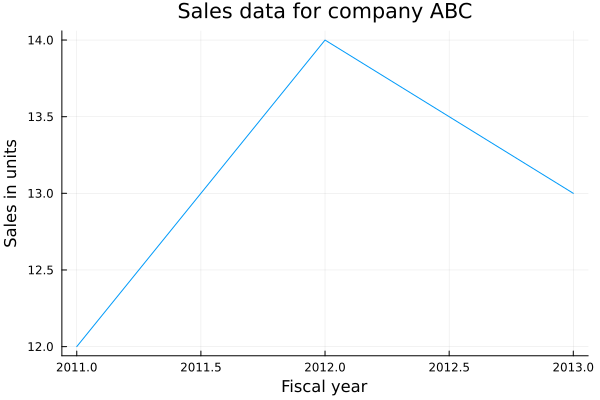

In [67]:
plot(df.date,
     df.sales,
     xlabel=colmetadata(df, :date, "label"),
     ylabel=colmetadata(df, :sales, "label"),
     title=metadata(df, "title"), legend=false)

Metadata is especially useful if you:
* work with multiple data frames that have many columns and it is hard to keep mental track of their interpretation, or
* want to have an automated pipeline (e.g. for producing tables or figures) where custom annotations should be used (as in the examples above)

For more details please refer to https://dataframes.juliadata.org/stable/lib/metadata/